Nilai ekspektasi energi internal:
$$
\begin{align}
\langle E \rangle & = 3 \sum_{\mathbf{k}} \hbar \omega(\mathbf{k})
\left[
n_{\mathbf{B}} (\beta\hbar\omega(\mathbf{k})) + \frac{1}{2}
\right] \\
& = 3 \frac{L^3}{(2\pi)^3} \int \mathrm{d}\mathbf{k} \, \hbar\omega(\mathbf{k})
\left[
n_{\mathbf{B}} (\beta\hbar\omega(\mathbf{k})) + \frac{1}{2}
\right]
\end{align}
$$

Dengan menggunakan simetri bola, integral 3D dapat diubah menjadi integral 1D terhadap koordinat radial ($k = \sqrt{\mathbf{k}\cdot\mathbf{k}}$):
$$
\begin{equation}
\int\mathrm{d}\mathbf{k} \rightarrow \int_{0}^{2\pi}\mathrm{d}\phi
\int_{0}^{\pi}\mathrm{d}\theta\sin\theta
\int_{0}^{\infty} k^2 \, \mathrm{d}k =
4\pi \int_{0}^{\infty} k^2 \, \mathrm{d}k
\end{equation}
$$

Dengan menggunakan hubungan $k = \omega/v$, ($v$ adalah kecepatan gelombang) diperoleh
$$
\begin{equation}
\langle E \rangle = 3 \frac{4\pi L^3}{(2\pi)^3} \int_{0}^{\infty}
\omega^2 \mathrm{d}\omega \frac{1}{v^3} \hbar\omega
\left[
n_{\mathbf{B}} (\beta\hbar\omega(\mathbf{k})) + \frac{1}{2}
\right]
\end{equation}
$$

Perhatikan suku berikut ini yang akan diberikan notasi $g(\omega)$
$$
\begin{equation}
g(\omega) = \frac{12\pi\omega^2 L^3}{(2\pi)^3 v^3}
\end{equation}
$$
Dengan menggunakan $N = nL^3$ di mana $n$ adalah kerapatan atom, suku tersebut dapat dituliskan menjadi:
$$
\begin{equation}
g(\omega) = N\left[
\frac{12\pi\omega^3}{(2\pi)^3 n v^3}
\right] =
N \frac{9\omega^2}{\omega^{3}_{\mathrm{D}}}
\end{equation}
$$
di mana kuantitas
$$
\begin{equation}
\omega^{3}_{\mathrm{D}} = 6\pi^2 n v^3
\end{equation}
$$
dikenal dengan nama **frekuensi Debye**.

$$
\langle E \rangle =
\int_{0}^{\infty} \mathrm{d}\omega\, \hbar\omega \, g(\omega)
\left[
n_{\mathbf{B}} (\beta\hbar\omega(\mathbf{k})) + \frac{1}{2}
\right]
$$

In [1]:
import sympy
from sympy import symbols, init_printing, exp, Integral, oo
init_printing(use_latex=True)

In [2]:
ω = symbols("omega")
kB = symbols("k_B")
T = symbols("T")
N = symbols("N")
β = symbols("beta")
ω_D = symbols("omega_D")
ħ = symbols("hbar")
x = symbols("x")

In [3]:
g_ω = N*9*ω**2/ω_D**3

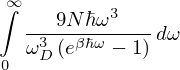

In [4]:
E = Integral( g_ω * ħ * ω / ( exp(β*ħ*ω) - 1 ), (ω,0,oo) )
E

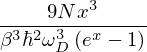

In [5]:
expr2 = E.args[0].subs(β*ħ*ω, x).subs(ω, x/(β*ħ))
expr2

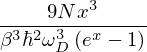

In [6]:
E.args[0].subs(β*ħ*ω, x).subs(ω, x/(β*ħ))

In [ ]:
E.doit()

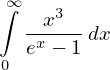

In [12]:
E = Integral( x**3 / (exp(x) - 1), (x,0,oo) )
E

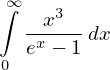

In [13]:
E.doit()

In [ ]:
Integral( expr2, (x,0,oo) )

In [ ]:
expr3 = Integral( x**3 / (exp(x) - 1), (x,0,oo) )
expr3

In [ ]:
expr3.doit()

In [ ]:
expr3 = Integral( x**3 / (exp(x) - 1), (x,0,10) )
expr3
expr3.doit()

In [14]:
import mpmath

In [15]:
f = lambda x: x**3/(exp(x) - 1)

In [16]:
import math

In [18]:
mpmath.quad( f, (0,100) )

mpf('6.4939394022668289')

In [21]:
import sympy
sympy.Rational(6,90)

In [25]:
mpmath.quad( f, (0,100) ) - math.pi**4/15

mpf('8.8817841970012523e-16')

In [26]:
expr2 = exp(x*x)

In [29]:
f = sympy.lambdify(x, expr2)

In [30]:
f(3)

In [34]:
from sympy import cos
sympy.integrate(x**2 * cos(x), x)
sympy.integrate(x**2 * cos(x), (x,-sympy.pi, sympy.pi))

## FCC dan BCC

In [1]:
from sympy import *

In [15]:
a = symbols("a")

BCC_matrix = Matrix([ [a, 0, 0], [0, a, 0], [a/2, a/2, a/2] ])

In [4]:
init_printing(use_latex=True)

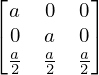

In [11]:
BCC_matrix

In [13]:
FCC_rec = 2*pi*BCC_matrix.inv()

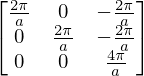

In [14]:
FCC_rec.transpose()

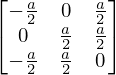

In [17]:
FCC_matrix = Matrix([ [-a/2, 0, a/2], [0, a/2, a/2], [-a/2, a/2, 0] ])
FCC_matrix

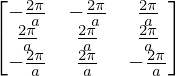

In [19]:
BCC_rec = 2*pi*FCC_matrix.inv().transpose()
BCC_rec

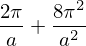

In [25]:
BCC_rec[0,0]**2 + BCC_rec[0,1]**2 + BCC_rec[0,2]